In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
path_archivo = "../input_data/f_Eigen_Header.csv"
datos_full = pd.read_csv(path_archivo, delimiter=",")
#datos_full = datos_full[datos_full["Cry_st"] != "Isotropic"]

In [3]:
datos_full.head()

,Shape,Cry_st,Feasibility,bx,by,bz,C00,C01,C02,C03,...,eig_90,eig_91,eig_92,eig_93,eig_94,eig_95,eig_96,eig_97,eig_98,eig_99
0,Ellipsoid,Isotropic,Yes,0.438724,2.369649,1.837070,1.149799,0.720716,0.720716,0.0,...,30.124273,31.756778,31.828683,32.583022,33.340539,33.968628,33.994184,34.654278,35.791310,37.978440
1,Cylinder,Isotropic,Yes,0.709018,1.467530,1.223673,1.492613,0.577460,0.577460,0.0,...,58.105415,58.471625,59.653785,60.074644,60.662669,62.629995,62.657775,63.861321,64.116515,64.133061
2,Parallelepiped,Isotropic,Yes,0.531058,1.760163,1.069808,0.372449,0.258287,0.258287,0.0,...,7.653962,7.769352,7.801352,7.822062,7.884461,7.892094,8.089836,8.215618,8.341789,8.370331
3,Ellipsoid,Isotropic,Yes,1.151652,1.274109,1.301589,1.455710,0.150292,0.150292,0.0,...,85.258973,85.265132,85.389027,85.389028,85.460895,85.551275,85.559349,86.770590,86.777264,86.866434
4,Ellipsoid,Isotropic,Yes,0.959751,1.454734,1.367915,1.924429,0.282162,0.282162,0.0,...,100.753148,100.785767,101.702983,101.713839,103.913062,103.914385,106.101876,107.936552,108.464264,109.413839


In [4]:
print("Cantidad de datos posibles: ", len(datos_full[datos_full["Feasibility"] == "Yes"]))
print("Cantidad de datos imposibles: ", len(datos_full[datos_full["Feasibility"] == "No"]))

Cantidad de datos posibles:  41551
Cantidad de datos imposibles:  0


In [5]:
datos_train, datos_test = train_test_split(datos_full, test_size = 0.35)
features = ["C00", "C11", "C22", "C33", "C44", "C55", "C01", "C02", "C12"]
X_full = datos_full[features]
y_full = datos_full["Feasibility"]

In [6]:
X_train = datos_train[features]
y_train = datos_train["Feasibility"]
X_test = datos_test[features]
y_test = datos_test["Feasibility"]

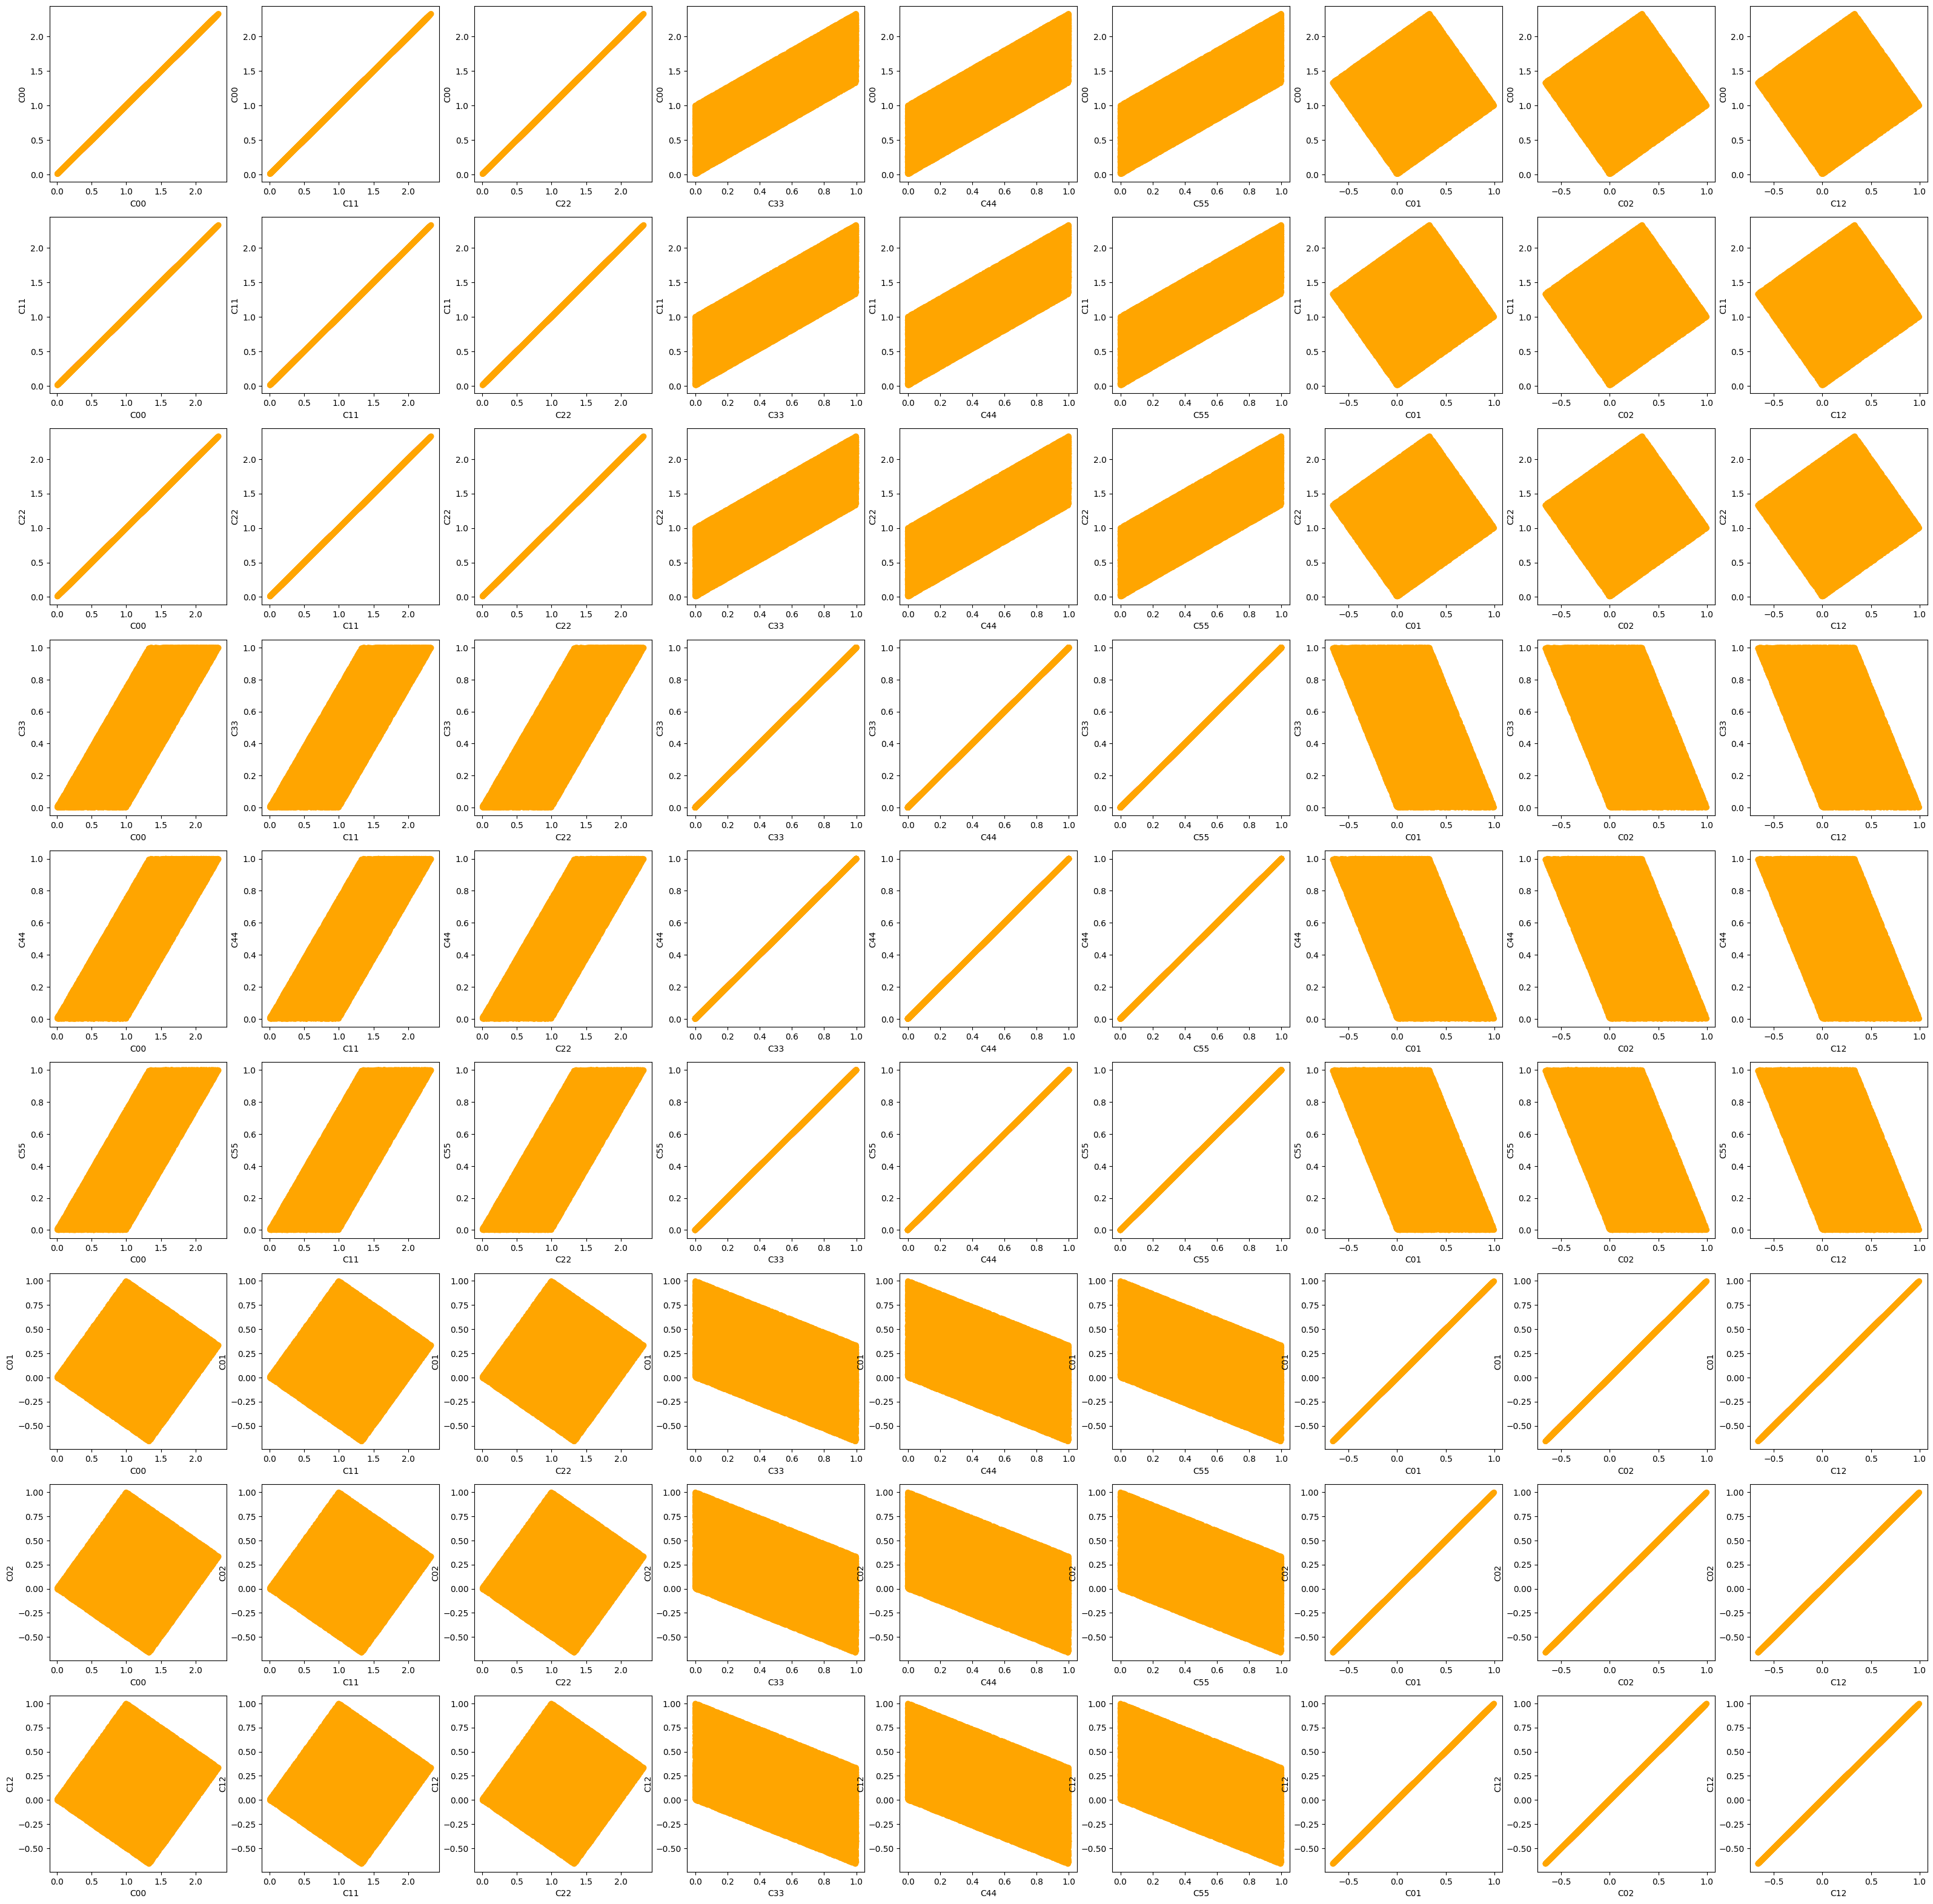

In [7]:
fig_full = plt.figure(figsize=(40,40))
colors_ref = {"No": "blue", "Yes": "orange"}
colors_array = list(map(lambda x: colors_ref[x], y_full))
for i, CX in enumerate(features):
    for j, CY in enumerate(features):
        ax = fig_full.add_subplot(len(features), len(features), i + 1 + len(features)*j)
        ax.scatter(X_full[CX], X_full[CY], c = colors_array)
        ax.set_xlabel(CX)
        ax.set_ylabel(CY)
    #fin for
#fin for 
plt.show()